In [1]:
import datetime as dt 
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import quandl
import numpy as np
from config import quandl_apikey
import requests
from sqlalchemy import create_engine
import plotly.graph_objects as go
import plotly
from matplotlib.ticker import FuncFormatter
import mplfinance as mpf
import matplotlib.dates as mdates

In [ ]:
#enter the stock to query
query_stock = "GOOGL"
#quandl.ApiConfig.api_key = quandl_apikey

In [ ]:
#api_url = f"https://www.quandl.com/api/v3/datasets/EOD/{query_stock}.csv?api_key={quandl_apikey}"

In [ ]:
#url = "https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv"

In [ ]:
#request_1 = requests.get(url)

# PARAMETER: for filtering 
#qopts.columns
#Request data from specific columns by passing the qopts.columns parameter. If you want to query for multiple columns, include #the column names separated by a comma.

#FILTERS:
#.gte=

#Modifies the parameter to return values greater than or equal to the requested value
#.lte=
#Modifies the parameter to return values less than or equal to the requested value

In [ ]:
#“WIKI/PRICES”
##WIKI IS END OF DAY US STOCK PRICES


In [ ]:
# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

# data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
#                     qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
#                     date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
#                     paginate=True)
#data

In [ ]:
#data.info()

In [ ]:
#data.describe()

In [ ]:
# create a new dataframe with 'date' column as index
#new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
#clean_data = new.pivot(columns='ticker')

# check the head of the output
#clean_data.head()

In [ ]:
#clean_data.tail()

In [ ]:
#clean_data.index

In [ ]:
#plt.plot(clean_data.index, clean_data['adj_close']['AAPL'])
#plt.plot(clean_data.index, clean_data['adj_close']['MSFT'])

In [ ]:
#plt.bar(clean_data.index, clean_data['adj_close']['WMT'])

In [ ]:
#data_tsx = quandl.get_table('TSX/', ticker = ['AAPL', 'MSFT', 'WMT'], 
                 #       qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                  #      date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                   #     paginate=True)
#data_tsx

In [ ]:
#data_query = quandl.get("EIA/PET_RWTC_D")

In [ ]:
#plt.plot(data_query.index, data_query['Value'])

In [ ]:
#tabledata
#do not need
#data = quandl.get_table('ZACKS/FC', paginate=True)

In [ ]:
#Getting forbidden error. 
#quandl.bulkdownload("AAPL")
#Stocks
#Apple - AAPL
#Microsoft - MSFT
#Walmart - WMT
#

In [ ]:
# pstock = target_stock

In [21]:
pstock = 'AAPL'

In [22]:
time_api = f"https://www.quandl.com/api/v3/datasets/WIKI/{pstock}/data.json?api_key={quandl_apikey}"

In [23]:
tquery_stock = requests.get(time_api)

In [24]:
stock_json = tquery_stock.json()

In [25]:
df = pd.DataFrame(stock_json['dataset_data']['data'],columns= stock_json['dataset_data']['column_names'])

In [26]:
df

Date    Open    High     Low    Close      Volume  Ex-Dividend  \
0     2018-03-27  173.68  175.15  166.92  168.340  38962839.0          0.0   
1     2018-03-26  168.07  173.10  166.44  172.770  36272617.0          0.0   
2     2018-03-23  168.39  169.92  164.94  164.940  40248954.0          0.0   
3     2018-03-22  170.00  172.68  168.60  168.845  41051076.0          0.0   
4     2018-03-21  175.04  175.09  171.26  171.270  35247358.0          0.0   
...          ...     ...     ...     ...      ...         ...          ...   
9395  1980-12-18   26.63   26.75   26.63   26.630    327900.0          0.0   
9396  1980-12-17   25.87   26.00   25.87   25.870    385900.0          0.0   
9397  1980-12-16   25.37   25.37   25.25   25.250    472000.0          0.0   
9398  1980-12-15   27.38   27.38   27.25   27.250    785200.0          0.0   
9399  1980-12-12   28.75   28.87   28.75   28.750   2093900.0          0.0   

      Split Ratio   Adj. Open   Adj. High    Adj. Low  Adj. Close  Adj. Volume  
0             1.0  173.680000  175.150000  166.920000  168.340000   38962839.0  
1             1.0  168.070000  173.100000  166.440000  172.770000   36272617.0  
2             1.0  168.390000  169.920000  164.940000  164.940000   40248954.0  
3             1.0  170.000000  172.680000  168.600000  168.845000   41051076.0  
4             1.0  175.040000  175.090000  171.260000  171.270000   35247358.0  
...           ...         ...         ...         ...         ...          ...  
9395          1.0    0.391536    0.393300    0.391536    0.391536   18362400.0  
9396          1.0    0.380362    0.382273    0.380362    0.380362   21610400.0  
9397          1.0    0.373010    0.373010    0.371246    0.371246   26432000.0  
9398          1.0    0.402563    0.402563    0.400652    0.400652   43971200.0  
9399          1.0    0.422706    0.424470    0.422706    0.422706  117258400.0  

[9400 rows x 13 columns]

In [27]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'],
      dtype='object')

In [28]:
#today = date.today()

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index(df['Date'],drop=True)

last_day = df.index[0]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 2018-03-27 to 1980-12-12
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9400 non-null   datetime64[ns]
 1   Open         9400 non-null   float64       
 2   High         9400 non-null   float64       
 3   Low          9400 non-null   float64       
 4   Close        9400 non-null   float64       
 5   Volume       9400 non-null   float64       
 6   Ex-Dividend  9400 non-null   float64       
 7   Split Ratio  9400 non-null   float64       
 8   Adj. Open    9400 non-null   float64       
 9   Adj. High    9400 non-null   float64       
 10  Adj. Low     9400 non-null   float64       
 11  Adj. Close   9400 non-null   float64       
 12  Adj. Volume  9400 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.0 MB


In [31]:
last_day

Timestamp('2018-03-27 00:00:00')

In [32]:
years = 2
days_per_year = 365.24
after_date = last_day - dt.timedelta(days=(years*days_per_year))

In [33]:
#targets index. do not need to specify
df2 = df.truncate(after = after_date)

In [34]:
# df_fb_tq_2year.head().to_csv("df_2year.csv")

In [35]:
df2.head()

Date    Open    High     Low    Close      Volume  \
Date                                                                 
2018-03-27 2018-03-27  173.68  175.15  166.92  168.340  38962839.0   
2018-03-26 2018-03-26  168.07  173.10  166.44  172.770  36272617.0   
2018-03-23 2018-03-23  168.39  169.92  164.94  164.940  40248954.0   
2018-03-22 2018-03-22  170.00  172.68  168.60  168.845  41051076.0   
2018-03-21 2018-03-21  175.04  175.09  171.26  171.270  35247358.0   

            Ex-Dividend  Split Ratio  Adj. Open  Adj. High  Adj. Low  \
Date                                                                   
2018-03-27          0.0          1.0     173.68     175.15    166.92   
2018-03-26          0.0          1.0     168.07     173.10    166.44   
2018-03-23          0.0          1.0     168.39     169.92    164.94   
2018-03-22          0.0          1.0     170.00     172.68    168.60   
2018-03-21          0.0          1.0     175.04     175.09    171.26   

            Adj. Close  Adj. Volume  
Date                                 
2018-03-27     168.340   38962839.0  
2018-03-26     172.770   36272617.0  
2018-03-23     164.940   40248954.0  
2018-03-22     168.845   41051076.0  
2018-03-21     171.270   35247358.0

In [36]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'],
      dtype='object')

In [37]:
pstock

'AAPL'

In [38]:
def convertdate(x):
    x = pd.to_datetime(x,format='%Y-%m-%d')
    return x

def convertunix(x):
    x = pd.to_datetime(x,unit='s')
    return x

In [39]:
df2 = df2.rename(columns={'Ex-Dividend':'ExDividend', 'Split Ratio':'SplitRatio','Adj. Open':'AdjOpen','Adj. High':'AdjHigh','Adj. Low':'AdjLow','Adj. Close':'AdjClose','Adj. Volume':'AdjVolume'})

In [40]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend',
       'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

In [41]:
# launches_df['launch_date_unix'] = launches_df['launch_date_unix'].apply(convertdate)
# launches_df['static_fire_date_utc'] = launches_df['static_fire_date_utc'].apply(convertdate)
# launches_df = launches_df.drop(columns=['rocket','launch_site','launch_failure_details','links'])

In [42]:
#Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend',
      # 'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      #dtype='object')

In [102]:
#Add stock ticker column
df['Ticker'] = pstock


#before transfomration the dtype is object. 
df['Date'] = pd.to_datetime(df['Date'])


#volume mva
volume_price = df2['AdjVolume']
df2['Vol_10wk_ma'] = volume_price.rolling(window=50).mean()

#close mva calculation
close_price = df2['AdjClose']

df2['Close_50d_ma'] = np.round(close_price.rolling(window = 50).mean(), 2)
df2['Close_10wk_ma'] = close_price.rolling(window=50).mean()
df2['Close_40wk_ma'] = close_price.rolling(window=200).mean()
df2['Close_5d_ma'] = close_price.rolling(window=5).mean()
df2['Close_10d_ma'] = close_price.rolling(window=10).mean()
df2['Close_20d_ma'] = close_price.rolling(window=20).mean()

#Creating Daily lag
df2['DailyLag'] = df2['AdjClose'].shift(1)
df2.head()

#Daily Return rate
df2['DailyReturn'] = (df2['DailyLag']/df2['AdjClose']) -1

#Some sort of return analysis
#

In [103]:
df2.head(100)

Date     Open      High     Low    Close      Volume  \
Date                                                                    
2018-03-27 2018-03-27  173.680  175.1500  166.92  168.340  38962839.0   
2018-03-26 2018-03-26  168.070  173.1000  166.44  172.770  36272617.0   
2018-03-23 2018-03-23  168.390  169.9200  164.94  164.940  40248954.0   
2018-03-22 2018-03-22  170.000  172.6800  168.60  168.845  41051076.0   
2018-03-21 2018-03-21  175.040  175.0900  171.26  171.270  35247358.0   
...               ...      ...       ...     ...      ...         ...   
2017-11-06 2017-11-06  172.365  174.9900  171.72  174.250  34242566.0   
2017-11-03 2017-11-03  174.000  174.2600  171.12  172.500  58683826.0   
2017-11-02 2017-11-02  167.640  168.5000  165.28  168.110  32710040.0   
2017-11-01 2017-11-01  169.870  169.9400  165.61  166.890  33100847.0   
2017-10-31 2017-10-31  167.900  169.6499  166.94  169.040  35474672.0   

            ExDividend  SplitRatio  AdjOpen   AdjHigh  ...   AdjVolume  \
Date                                                   ...               
2018-03-27         0.0         1.0  173.680  175.1500  ...  38962839.0   
2018-03-26         0.0         1.0  168.070  173.1000  ...  36272617.0   
2018-03-23         0.0         1.0  168.390  169.9200  ...  40248954.0   
2018-03-22         0.0         1.0  170.000  172.6800  ...  41051076.0   
2018-03-21         0.0         1.0  175.040  175.0900  ...  35247358.0   
...                ...         ...      ...       ...  ...         ...   
2017-11-06         0.0         1.0  172.365  174.9900  ...  34242566.0   
2017-11-03         0.0         1.0  174.000  174.2600  ...  58683826.0   
2017-11-02         0.0         1.0  167.640  168.5000  ...  32710040.0   
2017-11-01         0.0         1.0  169.870  169.9400  ...  33100847.0   
2017-10-31         0.0         1.0  167.900  169.6499  ...  35474672.0   

            Vol_10wk_ma  Close_10wk_ma  Close_40wk_ma  Close_5d_ma  \
Date                                                                 
2018-03-27          NaN            NaN            NaN          NaN   
2018-03-26          NaN            NaN            NaN          NaN   
2018-03-23          NaN            NaN            NaN          NaN   
2018-03-22          NaN            NaN            NaN          NaN   
2018-03-21          NaN            NaN            NaN      169.233   
...                 ...            ...            ...          ...   
2017-11-06  25623003.38      173.11044            NaN      174.716   
2017-11-03  26180123.72      172.99124            NaN      174.422   
2017-11-02  26229634.28      172.76824            NaN      173.110   
2017-11-01  26236596.54      172.52404            NaN      171.312   
2017-10-31  26362909.88      172.38104            NaN      170.158   

            Close_10d_ma  Close_20d_ma  DailyLag  DailyReturn  Close_50d_ma  
Date                                                                         
2018-03-27           NaN           NaN       NaN          NaN           NaN  
2018-03-26           NaN           NaN   168.340    -0.025641           NaN  
2018-03-23           NaN           NaN   172.770     0.047472           NaN  
2018-03-22           NaN           NaN   164.940    -0.023128           NaN  
2018-03-21           NaN           NaN   168.845    -0.014159           NaN  
...                  ...           ...       ...          ...           ...  
2017-11-06       172.523      172.3640   174.810     0.003214        173.11  
2017-11-03       172.775      172.5070   174.250     0.010145        172.99  
2017-11-02       172.571      172.4225   172.500     0.026114        172.77  
2017-11-01       172.150      172.2145   168.110     0.007310        172.52  
2017-10-31       172.146      172.0740   166.890    -0.012719        172.38  

[100 rows x 22 columns]

In [45]:
df2

Date    Open    High     Low    Close      Volume  \
Date                                                                 
2018-03-27 2018-03-27  173.68  175.15  166.92  168.340  38962839.0   
2018-03-26 2018-03-26  168.07  173.10  166.44  172.770  36272617.0   
2018-03-23 2018-03-23  168.39  169.92  164.94  164.940  40248954.0   
2018-03-22 2018-03-22  170.00  172.68  168.60  168.845  41051076.0   
2018-03-21 2018-03-21  175.04  175.09  171.26  171.270  35247358.0   
...               ...     ...     ...     ...      ...         ...   
2016-04-01 2016-04-01  108.78  110.00  108.20  109.990  25873950.0   
2016-03-31 2016-03-31  109.72  109.90  108.88  108.990  25888449.0   
2016-03-30 2016-03-30  108.65  110.42  108.60  109.560  45601149.0   
2016-03-29 2016-03-29  104.89  107.79  104.88  107.680  31190083.0   
2016-03-28 2016-03-28  106.00  106.19  105.06  105.190  19411372.0   

            ExDividend  SplitRatio     AdjOpen     AdjHigh  ...    AdjClose  \
Date                                                        ...               
2018-03-27         0.0         1.0  173.680000  175.150000  ...  168.340000   
2018-03-26         0.0         1.0  168.070000  173.100000  ...  172.770000   
2018-03-23         0.0         1.0  168.390000  169.920000  ...  164.940000   
2018-03-22         0.0         1.0  170.000000  172.680000  ...  168.845000   
2018-03-21         0.0         1.0  175.040000  175.090000  ...  171.270000   
...                ...         ...         ...         ...  ...         ...   
2016-04-01         0.0         1.0  105.663396  106.848443  ...  106.838729   
2016-03-31         0.0         1.0  106.576465  106.751308  ...  105.867380   
2016-03-30         0.0         1.0  105.537121  107.256410  ...  106.421049   
2016-03-29         0.0         1.0  101.884847  104.701760  ...  104.594912   
2016-03-28         0.0         1.0  102.963045  103.147601  ...  102.176252   

             AdjVolume  Vol_10wk_ma  Close_10wk_ma  Close_40wk_ma  \
Date                                                                
2018-03-27  38962839.0          NaN            NaN            NaN   
2018-03-26  36272617.0          NaN            NaN            NaN   
2018-03-23  40248954.0          NaN            NaN            NaN   
2018-03-22  41051076.0          NaN            NaN            NaN   
2018-03-21  35247358.0          NaN            NaN            NaN   
...                ...          ...            ...            ...   
2016-04-01  25873950.0  39925250.78      97.920907     104.697159   
2016-03-31  25888449.0  39808761.04      98.106548     104.638648   
2016-03-30  45601149.0  40188756.94      98.287234     104.581867   
2016-03-29  31190083.0  40395595.98      98.445276     104.513487   
2016-03-28  19411372.0  40335634.42      98.553185     104.436175   

            Close_5d_ma  Close_10d_ma  Close_20d_ma    DailyLag  DailyReturn  
Date                                                                          
2018-03-27          NaN           NaN           NaN         NaN          NaN  
2018-03-26          NaN           NaN           NaN  168.340000    -0.025641  
2018-03-23          NaN           NaN           NaN  172.770000     0.047472  
2018-03-22          NaN           NaN           NaN  164.940000    -0.023128  
2018-03-21   169.233000           NaN           NaN  168.845000    -0.014159  
...                 ...           ...           ...         ...          ...  
2016-04-01   106.930036    107.108764    104.312249  107.936354     0.010274  
2016-03-31   107.017458    106.806675    104.999965  106.838729     0.009175  
2016-03-30   106.745480    106.565780    105.570147  105.867380    -0.005203  
2016-03-29   106.331685    106.297688    105.731877  106.421049     0.017459  
2016-03-28   105.179664    105.925661    105.737219  104.594912     0.023671  

[503 rows x 21 columns]

In [46]:
# def SMA(x):
#     for x in range(10):
#         x = x + x
#         print(x)
#     x = x / 10
#     return x

# SMA([1,2,3,4,5,6,7,8,9,10])

In [47]:
# df_fb_tq_2year['Adj. Volume'][:10]

In [48]:
# bin_length_10week = len(df2.index) / 70
# bin_length_40week = len(df2.index) / 280

In [49]:
df2_weekly = df2.resample("W").sum()["Volume"]

In [50]:
df2_weekly_clean = pd.DataFrame(df2_weekly)

In [51]:
df2_weekly_clean.index = pd.to_datetime(df2_weekly_clean.index, format="%Y-%m-%d")

In [52]:
volume_price_weekly = df2_weekly_clean['Volume']
df2_weekly_clean['TenWeek'] = volume_price_weekly.rolling(window=10).mean()

In [53]:
df2_weekly_clean['Date'] = df2_weekly_clean.index

In [54]:
df2_weekly_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2016-04-03 to 2018-04-01
Freq: W-SUN
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Volume   105 non-null    float64       
 1   TenWeek  96 non-null     float64       
 2   Date     105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.3 KB


In [55]:
df2_weekly_clean

Volume      TenWeek       Date
Date                                           
2016-04-03  147965003.0          NaN 2016-04-03
2016-04-10  145722543.0          NaN 2016-04-10
2016-04-17  162310051.0          NaN 2016-04-17
2016-04-24  189053016.0          NaN 2016-04-24
2016-05-01  349424063.0          NaN 2016-05-01
...                 ...          ...        ...
2018-03-04  196432091.0  171116131.7 2018-03-04
2018-03-11  138442235.0  175332187.3 2018-03-11
2018-03-18  151720299.0  180594694.9 2018-03-18
2018-03-25  168666122.0  186706444.9 2018-03-25
2018-04-01   75235456.0  181932584.5 2018-04-01

[105 rows x 3 columns]

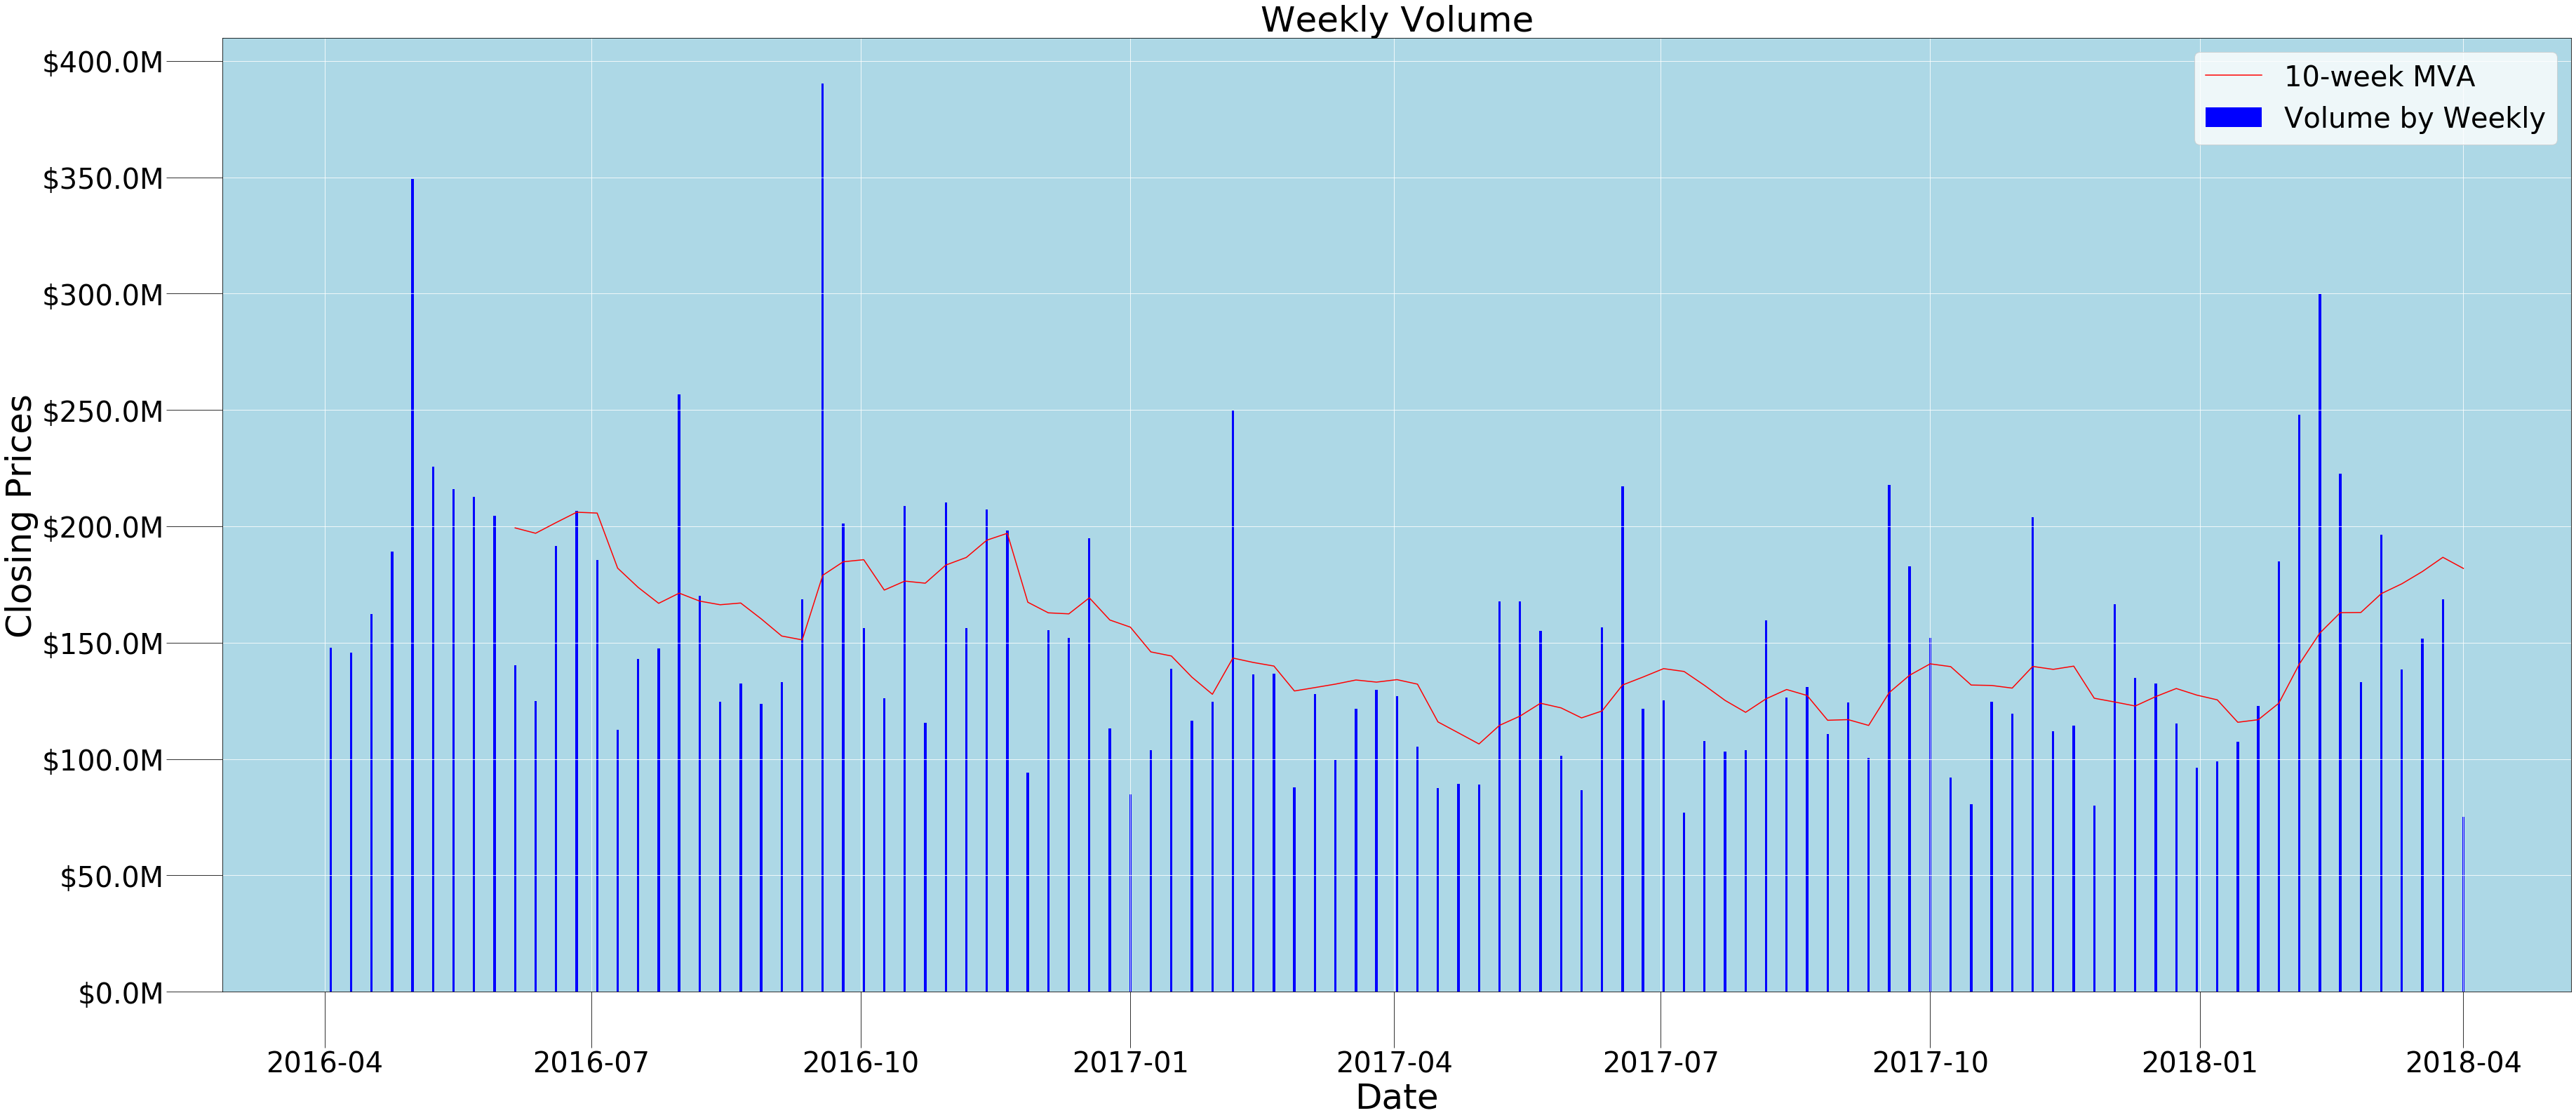

In [56]:
# plt.plot(df2_weekly_clean['Date'],df2_weekly_clean['Volume'],type="bar")
# x = np.arange(4)
# money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

# fig, ax = plt.subplots()

# plt.bar(x, money)
# plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
# plt.show()

x_axis_vol_weekly = df2_weekly_clean['Volume']
y_axis = df2_weekly_clean['Date']
x_axis_ma = df2_weekly_clean['TenWeek']




figure, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(y_axis,x_axis_vol_weekly,color='b',label='Volume by Weekly')
ax.plot(y_axis,x_axis_ma, color='r',label='10-week MVA')
# ax.plot(y_axis,x_axis_40week,color='r')

ax.grid(color='white')
ax.set_title(f'Weekly Volume',size = 50)
ax.set_xlabel('Date',fontsize = 50)
ax.set_ylabel('Closing Prices',fontsize = 50)
ax.set_facecolor('lightblue')
figure.set_figheight(25)
figure.set_figwidth(60)
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40,size=80)
plt.savefig("static/img/volume_weekly.png")
# plt.savefig(os.path.join(f'Closing Price and Moving Average'))
plt.show()

In [57]:
# df_by_volume_10week =  df2.groupby(pd.cut(df2.index, bins=bin_length_10week, 
#         precision=0))["Volume"].sum()

In [58]:
# df_by_volume_10week = pd.DataFrame(df_by_volume_10week)

In [59]:
# df_by_volume_10week = df_by_volume_10week.reset_index(drop=True)
# df_by_volume_10week['Volume'] = df_by_volume_10week['Volume'] / bin_length_10week

In [60]:
##VWAP

In [61]:
#simple moving average
# df_7day_volume_clean['SMA']


In [62]:
# bin_length_ten = np.round(bin_length_10week)
# bin_length_forty = np.round(bin_length_40week)

In [63]:
# df_by_close_10week =  df_fb_tq_2year.groupby(pd.cut(df_fb_tq_2year.index, bins=bin_length_ten, 
#         precision=0))["Adj. Close"].sum()
# df_by_close_40week =  df_fb_tq_2year.groupby(pd.cut(df_fb_tq_2year.index, bins=bin_length_forty, 
#         precision=0))["Adj. Close"].sum()

In [64]:
# df_by_close_10week = pd.DataFrame(df_by_close_10week)
# df_by_close_40week = pd.DataFrame(df_by_close_40week)

In [65]:
# df_by_close_10week = df_by_close_10week.reset_index(drop=True)
# df_by_close_40week = df_by_close_40week.reset_index(drop=True)

In [66]:
# df_by_close_10week['Adj. Close'] = df_by_close_10week['Adj. Close'] / 70
# df_by_close_40week['Adj. Close'] = df_by_close_40week['Adj. Close'] / 280

In [67]:
# df_10week_avg = df_by_close_10week
# df_40week_avg = df_by_close_40week

In [68]:
# df_10week_avg

In [69]:
# df_40week_avg

In [70]:
# df_7day_volume_clean

In [71]:
# df_fb_tq_2year.head()

In [72]:
# df_fb_tq_2year.head(50)

In [73]:
df2

Date    Open    High     Low    Close      Volume  \
Date                                                                 
2018-03-27 2018-03-27  173.68  175.15  166.92  168.340  38962839.0   
2018-03-26 2018-03-26  168.07  173.10  166.44  172.770  36272617.0   
2018-03-23 2018-03-23  168.39  169.92  164.94  164.940  40248954.0   
2018-03-22 2018-03-22  170.00  172.68  168.60  168.845  41051076.0   
2018-03-21 2018-03-21  175.04  175.09  171.26  171.270  35247358.0   
...               ...     ...     ...     ...      ...         ...   
2016-04-01 2016-04-01  108.78  110.00  108.20  109.990  25873950.0   
2016-03-31 2016-03-31  109.72  109.90  108.88  108.990  25888449.0   
2016-03-30 2016-03-30  108.65  110.42  108.60  109.560  45601149.0   
2016-03-29 2016-03-29  104.89  107.79  104.88  107.680  31190083.0   
2016-03-28 2016-03-28  106.00  106.19  105.06  105.190  19411372.0   

            ExDividend  SplitRatio     AdjOpen     AdjHigh  ...    AdjClose  \
Date                                                        ...               
2018-03-27         0.0         1.0  173.680000  175.150000  ...  168.340000   
2018-03-26         0.0         1.0  168.070000  173.100000  ...  172.770000   
2018-03-23         0.0         1.0  168.390000  169.920000  ...  164.940000   
2018-03-22         0.0         1.0  170.000000  172.680000  ...  168.845000   
2018-03-21         0.0         1.0  175.040000  175.090000  ...  171.270000   
...                ...         ...         ...         ...  ...         ...   
2016-04-01         0.0         1.0  105.663396  106.848443  ...  106.838729   
2016-03-31         0.0         1.0  106.576465  106.751308  ...  105.867380   
2016-03-30         0.0         1.0  105.537121  107.256410  ...  106.421049   
2016-03-29         0.0         1.0  101.884847  104.701760  ...  104.594912   
2016-03-28         0.0         1.0  102.963045  103.147601  ...  102.176252   

             AdjVolume  Vol_10wk_ma  Close_10wk_ma  Close_40wk_ma  \
Date                                                                
2018-03-27  38962839.0          NaN            NaN            NaN   
2018-03-26  36272617.0          NaN            NaN            NaN   
2018-03-23  40248954.0          NaN            NaN            NaN   
2018-03-22  41051076.0          NaN            NaN            NaN   
2018-03-21  35247358.0          NaN            NaN            NaN   
...                ...          ...            ...            ...   
2016-04-01  25873950.0  39925250.78      97.920907     104.697159   
2016-03-31  25888449.0  39808761.04      98.106548     104.638648   
2016-03-30  45601149.0  40188756.94      98.287234     104.581867   
2016-03-29  31190083.0  40395595.98      98.445276     104.513487   
2016-03-28  19411372.0  40335634.42      98.553185     104.436175   

            Close_5d_ma  Close_10d_ma  Close_20d_ma    DailyLag  DailyReturn  
Date                                                                          
2018-03-27          NaN           NaN           NaN         NaN          NaN  
2018-03-26          NaN           NaN           NaN  168.340000    -0.025641  
2018-03-23          NaN           NaN           NaN  172.770000     0.047472  
2018-03-22          NaN           NaN           NaN  164.940000    -0.023128  
2018-03-21   169.233000           NaN           NaN  168.845000    -0.014159  
...                 ...           ...           ...         ...          ...  
2016-04-01   106.930036    107.108764    104.312249  107.936354     0.010274  
2016-03-31   107.017458    106.806675    104.999965  106.838729     0.009175  
2016-03-30   106.745480    106.565780    105.570147  105.867380    -0.005203  
2016-03-29   106.331685    106.297688    105.731877  106.421049     0.017459  
2016-03-28   105.179664    105.925661    105.737219  104.594912     0.023671  

[503 rows x 21 columns]

In [74]:
df2.to_csv("df.csv")

In [75]:
#CANDLESTICK DATA
fig_plotly = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['AdjOpen'],
                high=df2['AdjHigh'],
                low=df2['AdjLow'],
                close=df2['AdjClose'])])

fig_plotly.show()

In [76]:
# plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')

In [77]:
#MOVING AVERAGE VS CLOSING PRICE

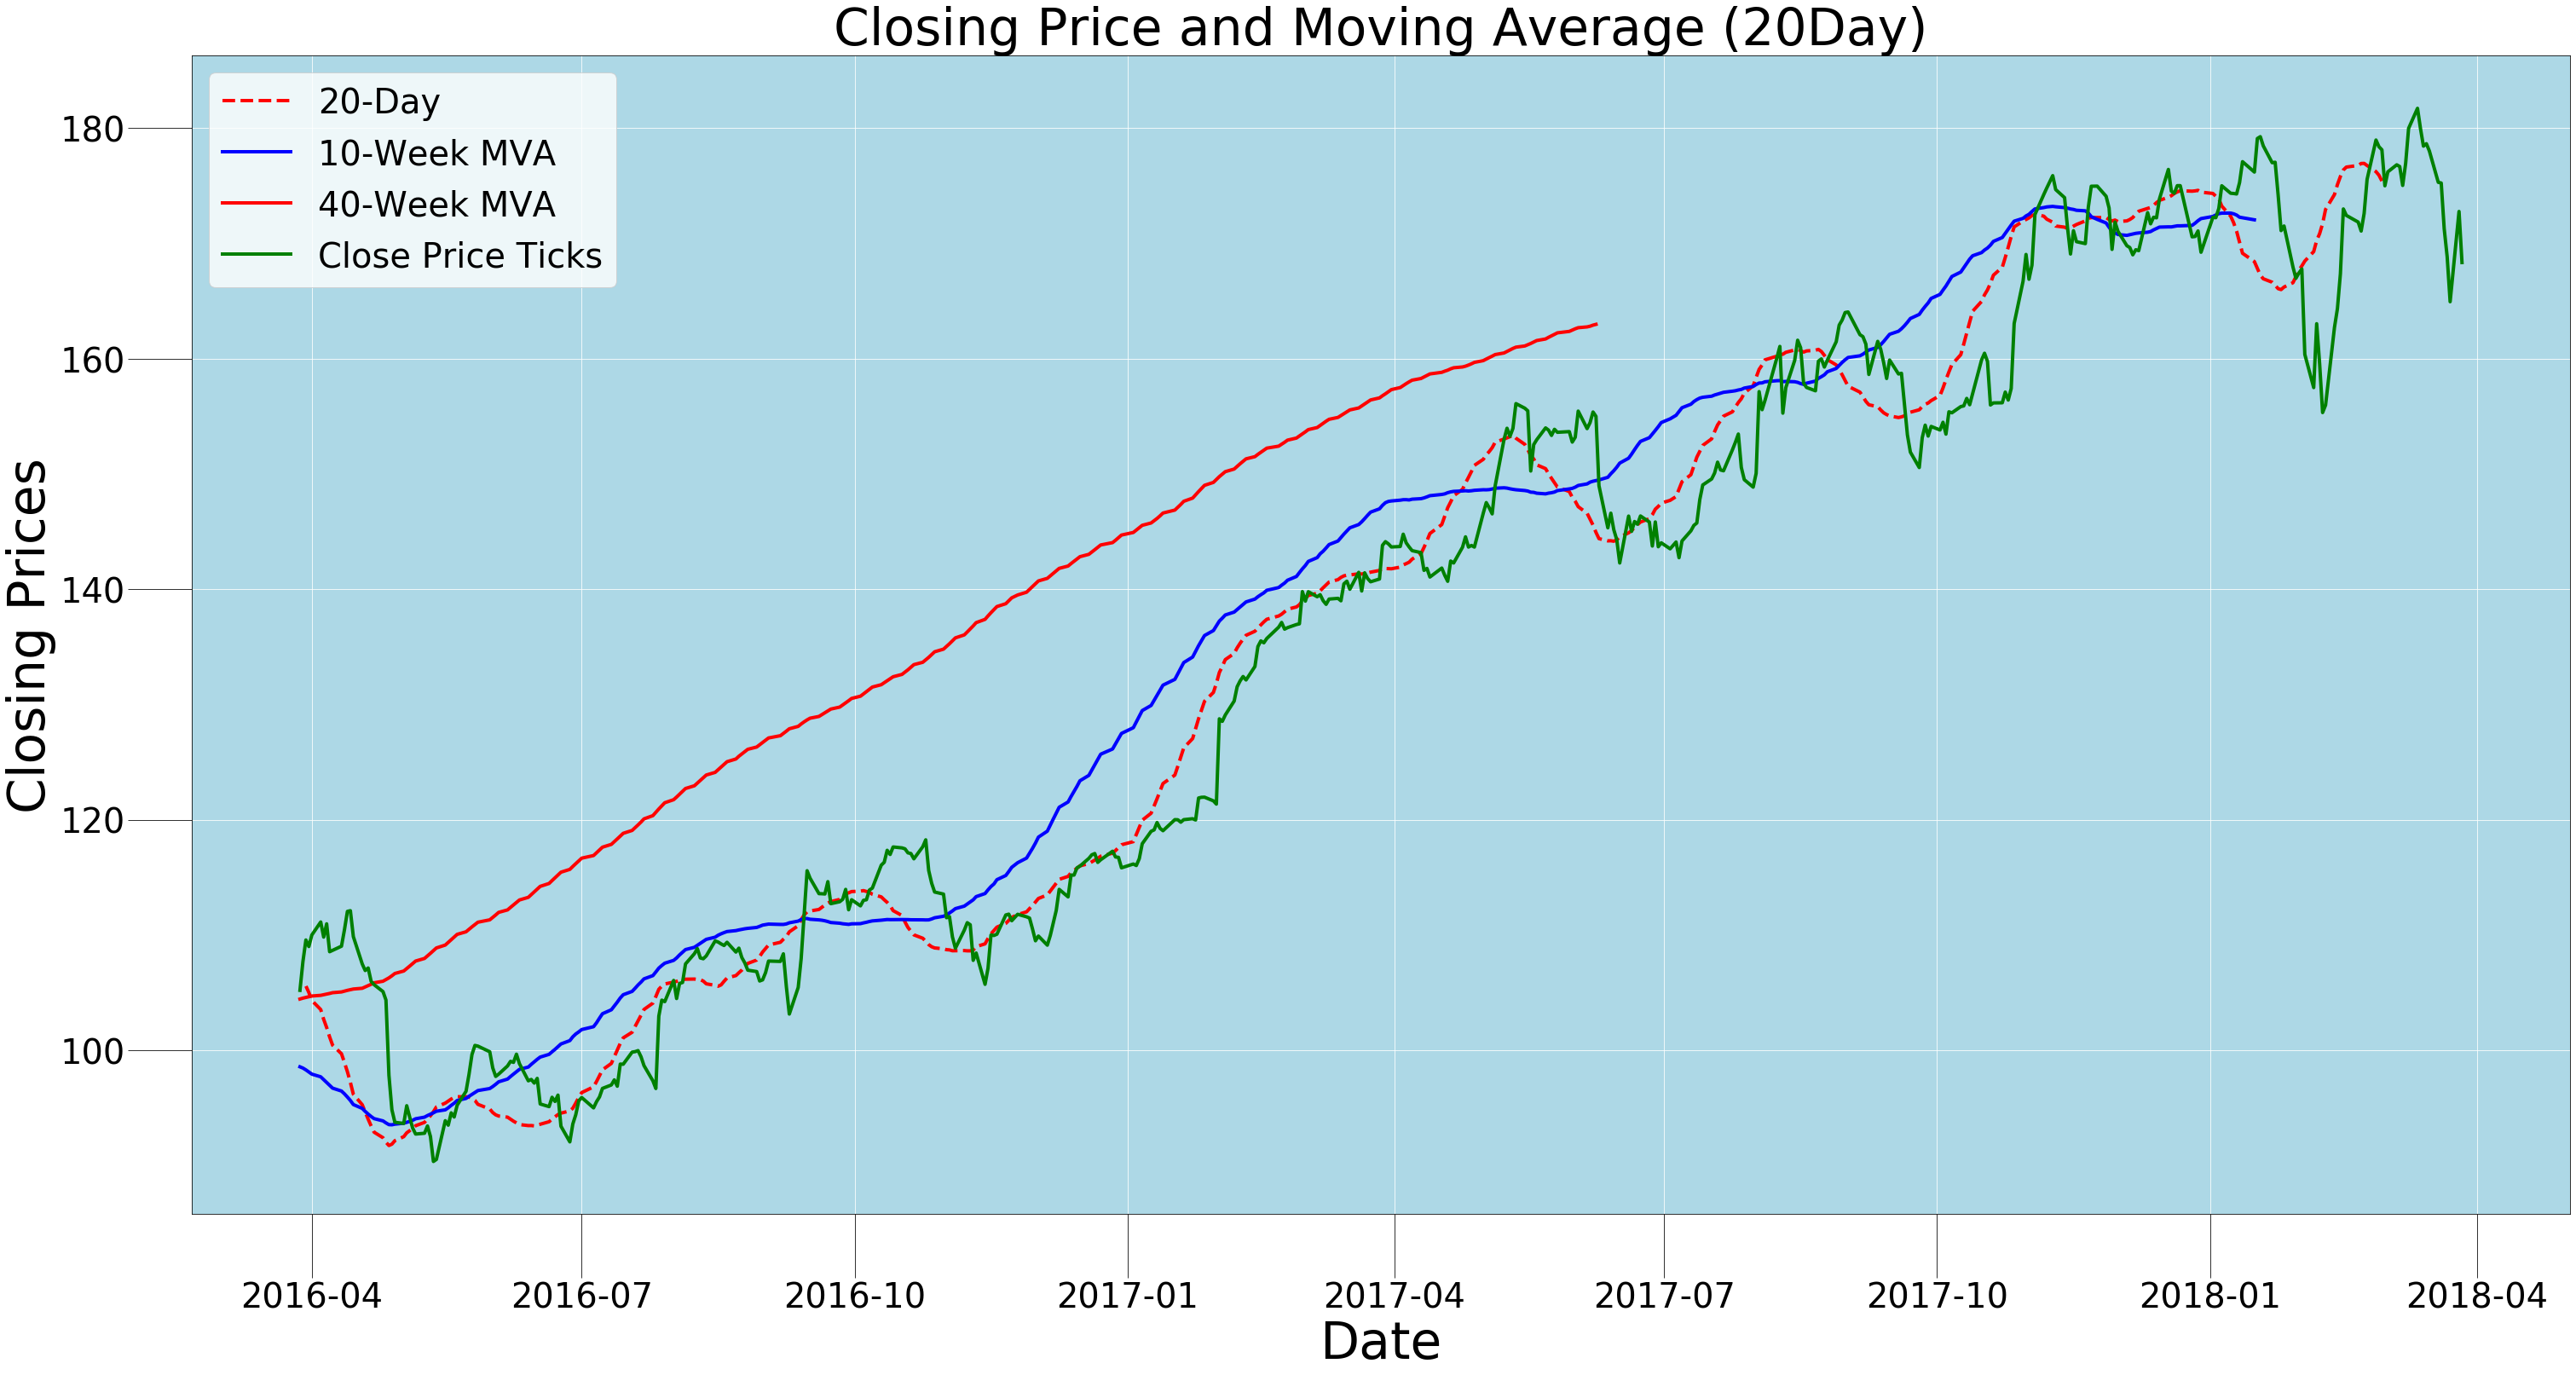

In [78]:
# style.use('ggplot')
# close_px.plot()
# df_fb_tq_2year['Close_10week_mvg'].plot(label='10-week MVA')
# df_fb_tq_2year['Close_40week_mvg'].plot(label='40-week MVA')
# plt.show() # add this if you're not using Jupyter Notebook

# x_axis = df_7day_volume_clean['Date']
# y_axis = df_7day_volume_clean['Volume']
x_axis_5d = df2['Close_5d_ma']
x_axis_10d = df2['Close_10d_ma']
x_axis_20d = df2['Close_20d_ma']
x_axis_10week = df2['Close_10wk_ma']
x_axis_40week = df2['Close_40wk_ma']
x_axis_close = df2['Close']
y_axis = df2['Date']


#20day-10-40wk-close#
figure, ax = plt.subplots(figsize=(50,25))

ax.plot(y_axis,x_axis_20d,linestyle='--',color='r',label='20-Day',linewidth=4)

ax.plot(y_axis,x_axis_10week,color='b',label='10-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_40week,color='r',label='40-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_close,color='green',label='Close Price Ticks',linewidth=4)
ax.grid(color='white')
ax.set_title(f'Closing Price and Moving Average (20Day)',size = 60)
ax.set_xlabel('Date',fontsize = 60)
ax.set_ylabel('Closing Prices',fontsize = 60)
ax.set_facecolor('lightblue')
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40,size=75)
plt.savefig("static/img/20d-wk-close.png")
# plt.savefig(os.path.join(f'Closing Price and Moving Average'))
plt.show()

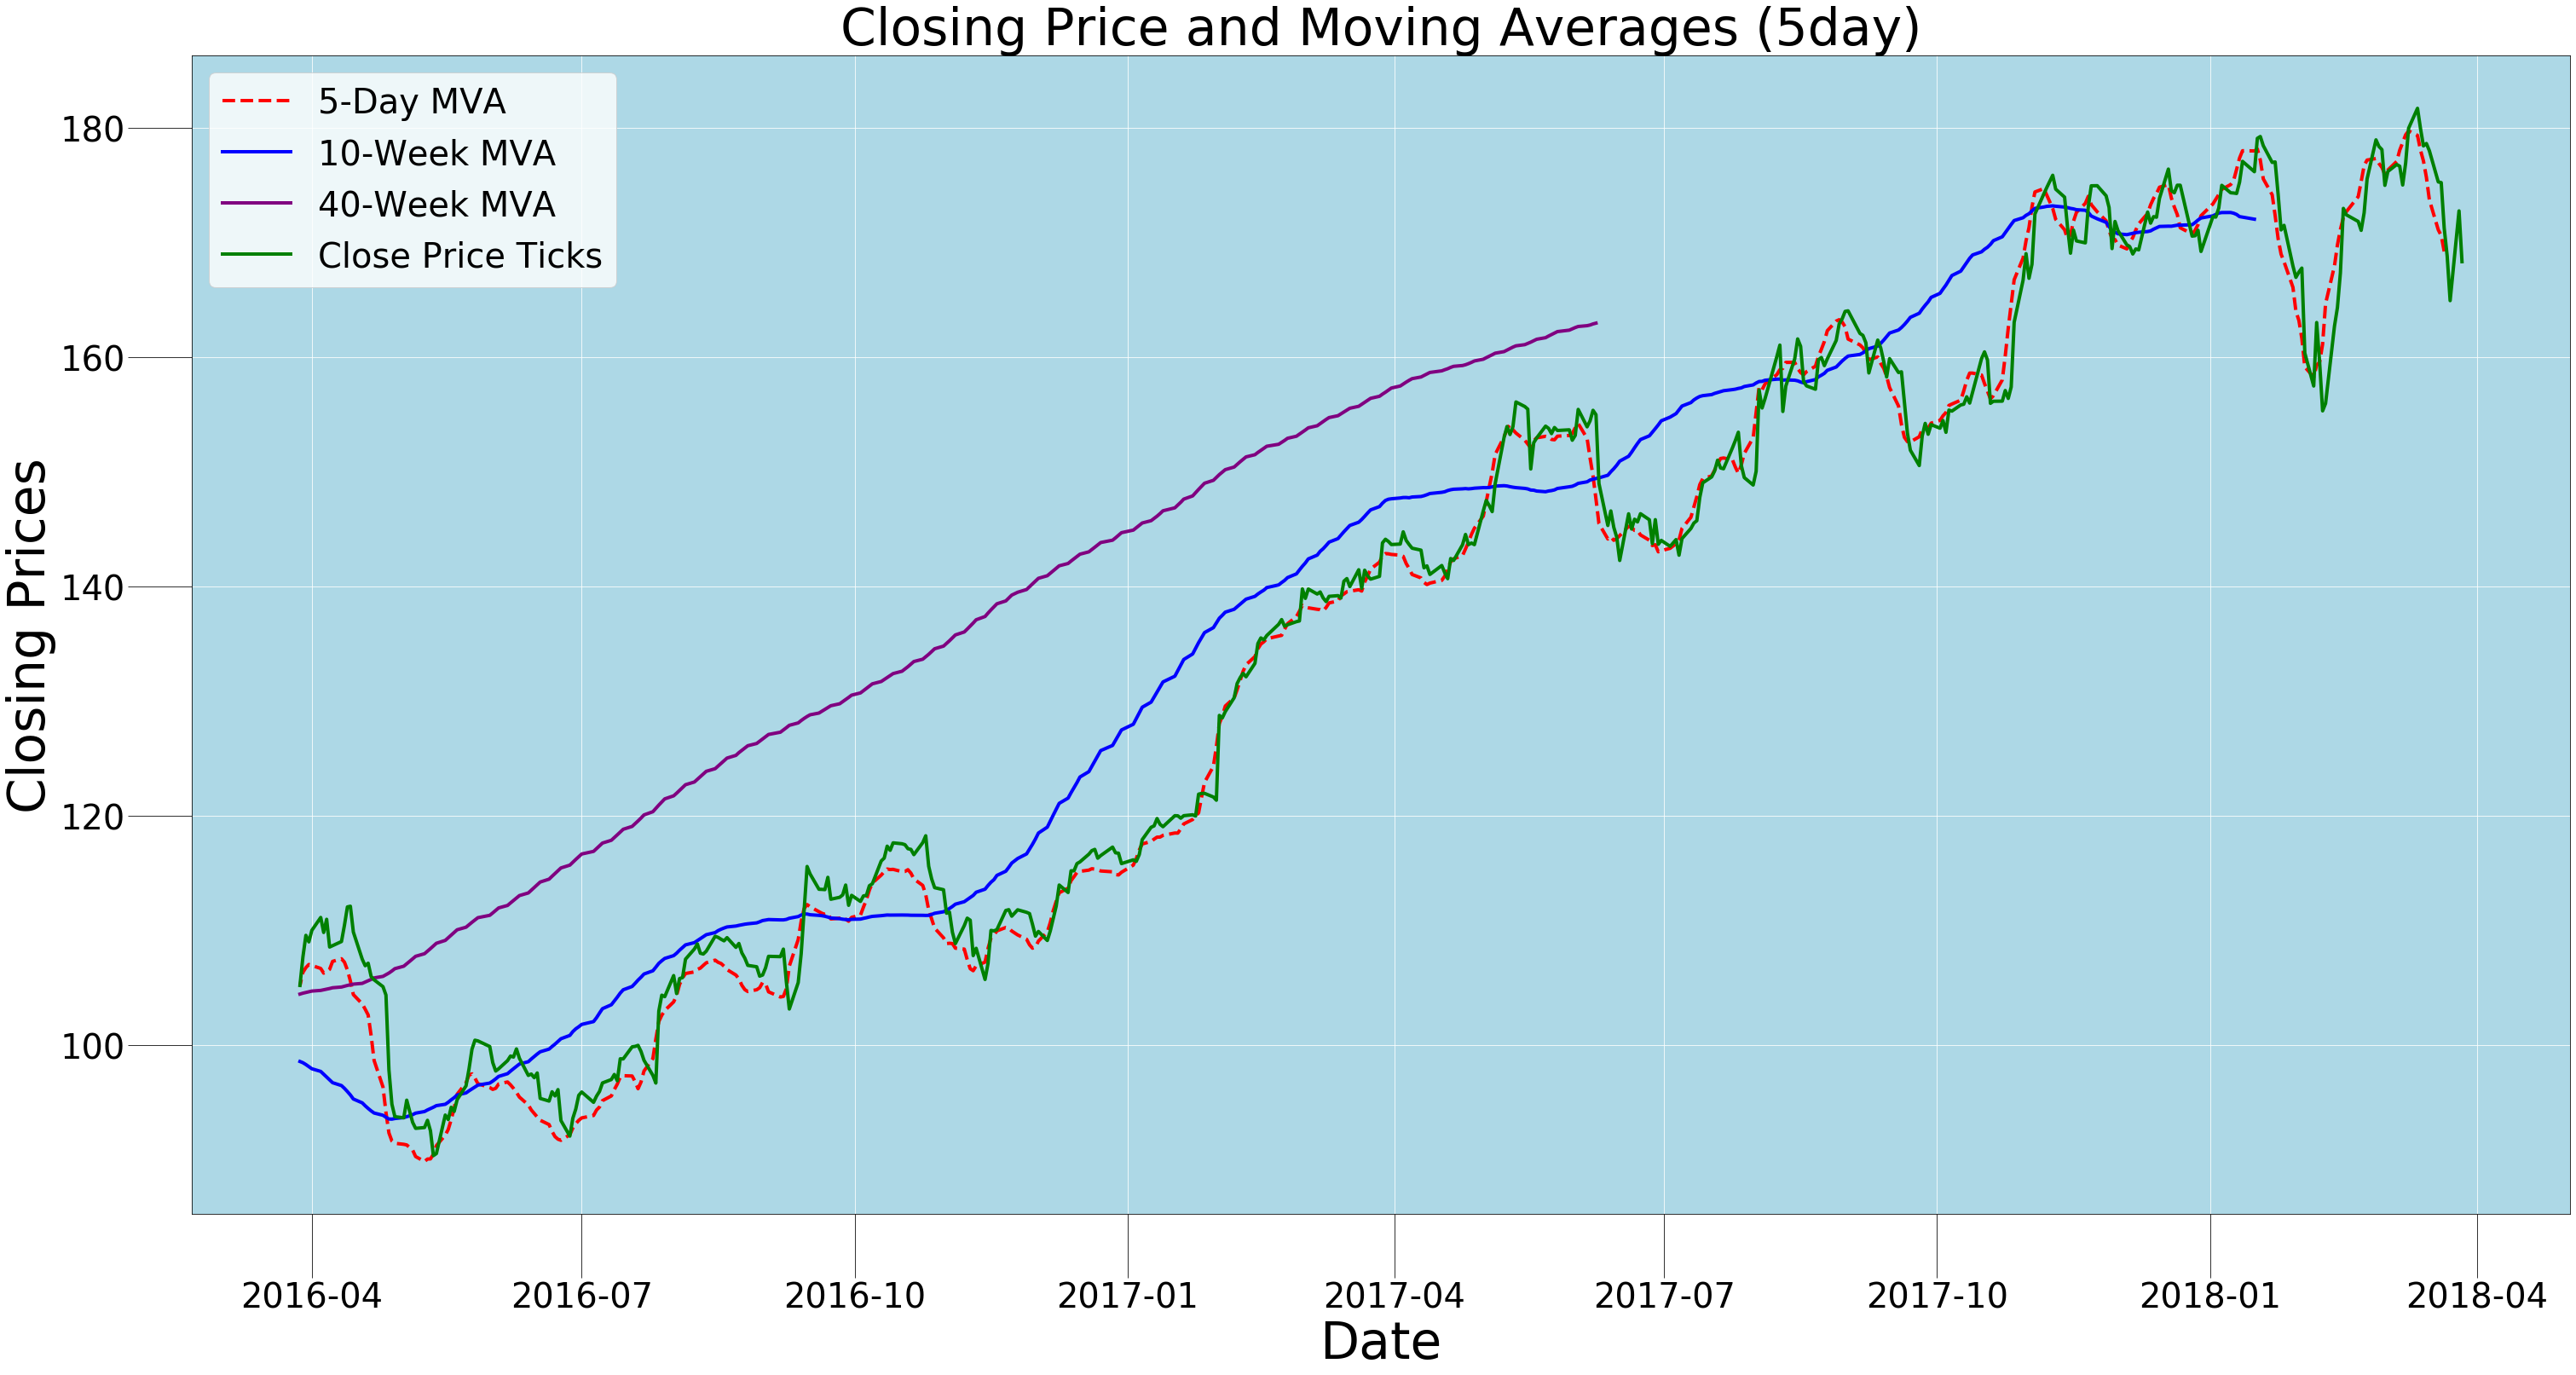

In [79]:

figure, ax = plt.subplots()
ax.plot(y_axis,x_axis_5d,linestyle="--",color="r",label='5-Day MVA',linewidth=4)

ax.plot(y_axis,x_axis_10week,color='b',label='10-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_40week,color='purple',label='40-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_close,color='green',label='Close Price Ticks',linewidth=4)
ax.grid(color='white')
ax.set_title(f'Closing Price and Moving Averages (5day)',size = 60)
ax.set_xlabel('Date',fontsize = 60)
ax.set_ylabel('Closing Prices',fontsize = 60)
ax.set_facecolor('lightblue')
figure.set_figheight(25)
figure.set_figwidth(50)
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40,size=75)
plt.savefig("static/img/5d-wk-close.png")
# plt.savefig(os.path.join(f'Closing Price and Moving Average'))
plt.show()

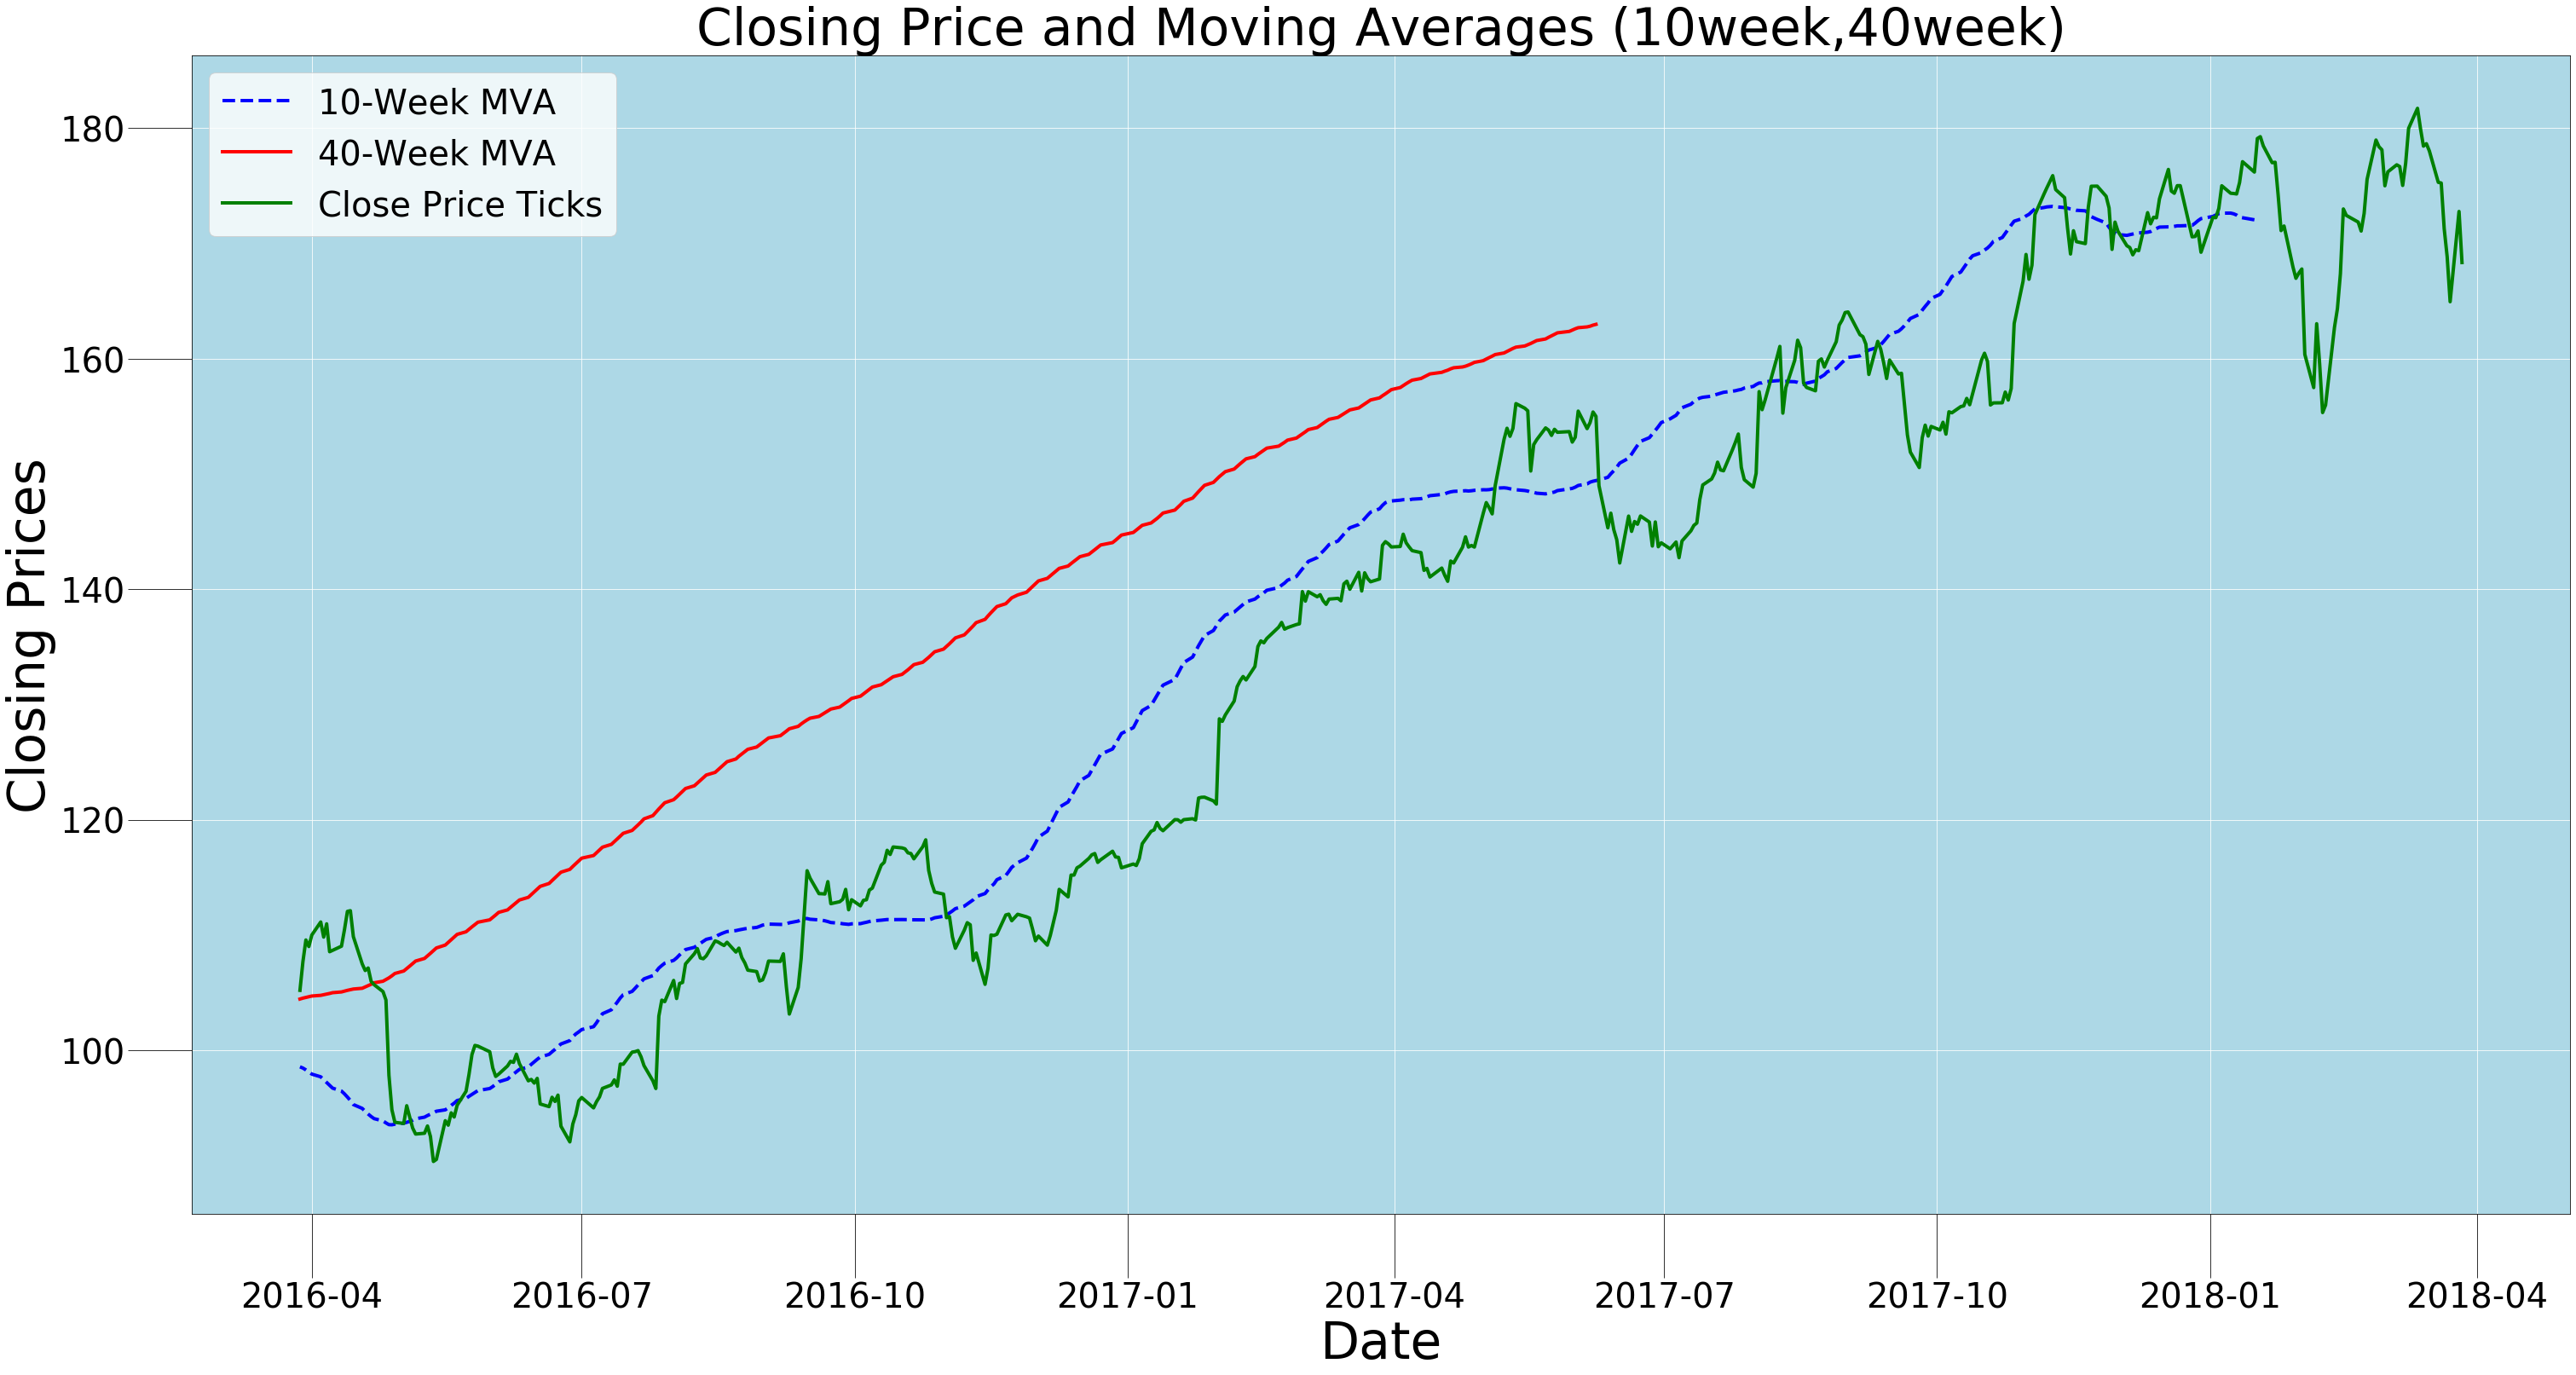

In [80]:
figure, ax = plt.subplots()
ax.plot(y_axis,x_axis_10week,linestyle="--",color='b',label='10-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_40week,color='red',label='40-Week MVA',linewidth=4)
ax.plot(y_axis,x_axis_close,color='green',label='Close Price Ticks',linewidth=4)
ax.grid(color='white')
ax.set_title(f'Closing Price and Moving Averages (10week,40week)',size = 60)
ax.set_xlabel('Date',fontsize = 60)
ax.set_ylabel('Closing Prices',fontsize = 60)
ax.set_facecolor('lightblue')
figure.set_figheight(25)
figure.set_figwidth(50)
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40,size=75)
plt.savefig("static/img/wk-close-ma.png")

In [81]:
# volume_px.head(10).plot.bar()
# df_fb_tq_2year['Vol_10wk_mvg'].head(10).plot()

In [82]:
# dfreg = df.loc[:,[‘Adj Close’,’Volume’]]
# dfreg[‘HL_PCT’] = (df[‘High’] — df[‘Low’]) / df[‘Close’] * 100.0
# dfreg[‘PCT_change’] = (df[‘Close’] — df[‘Open’]) / df[‘Open’] * 100.0

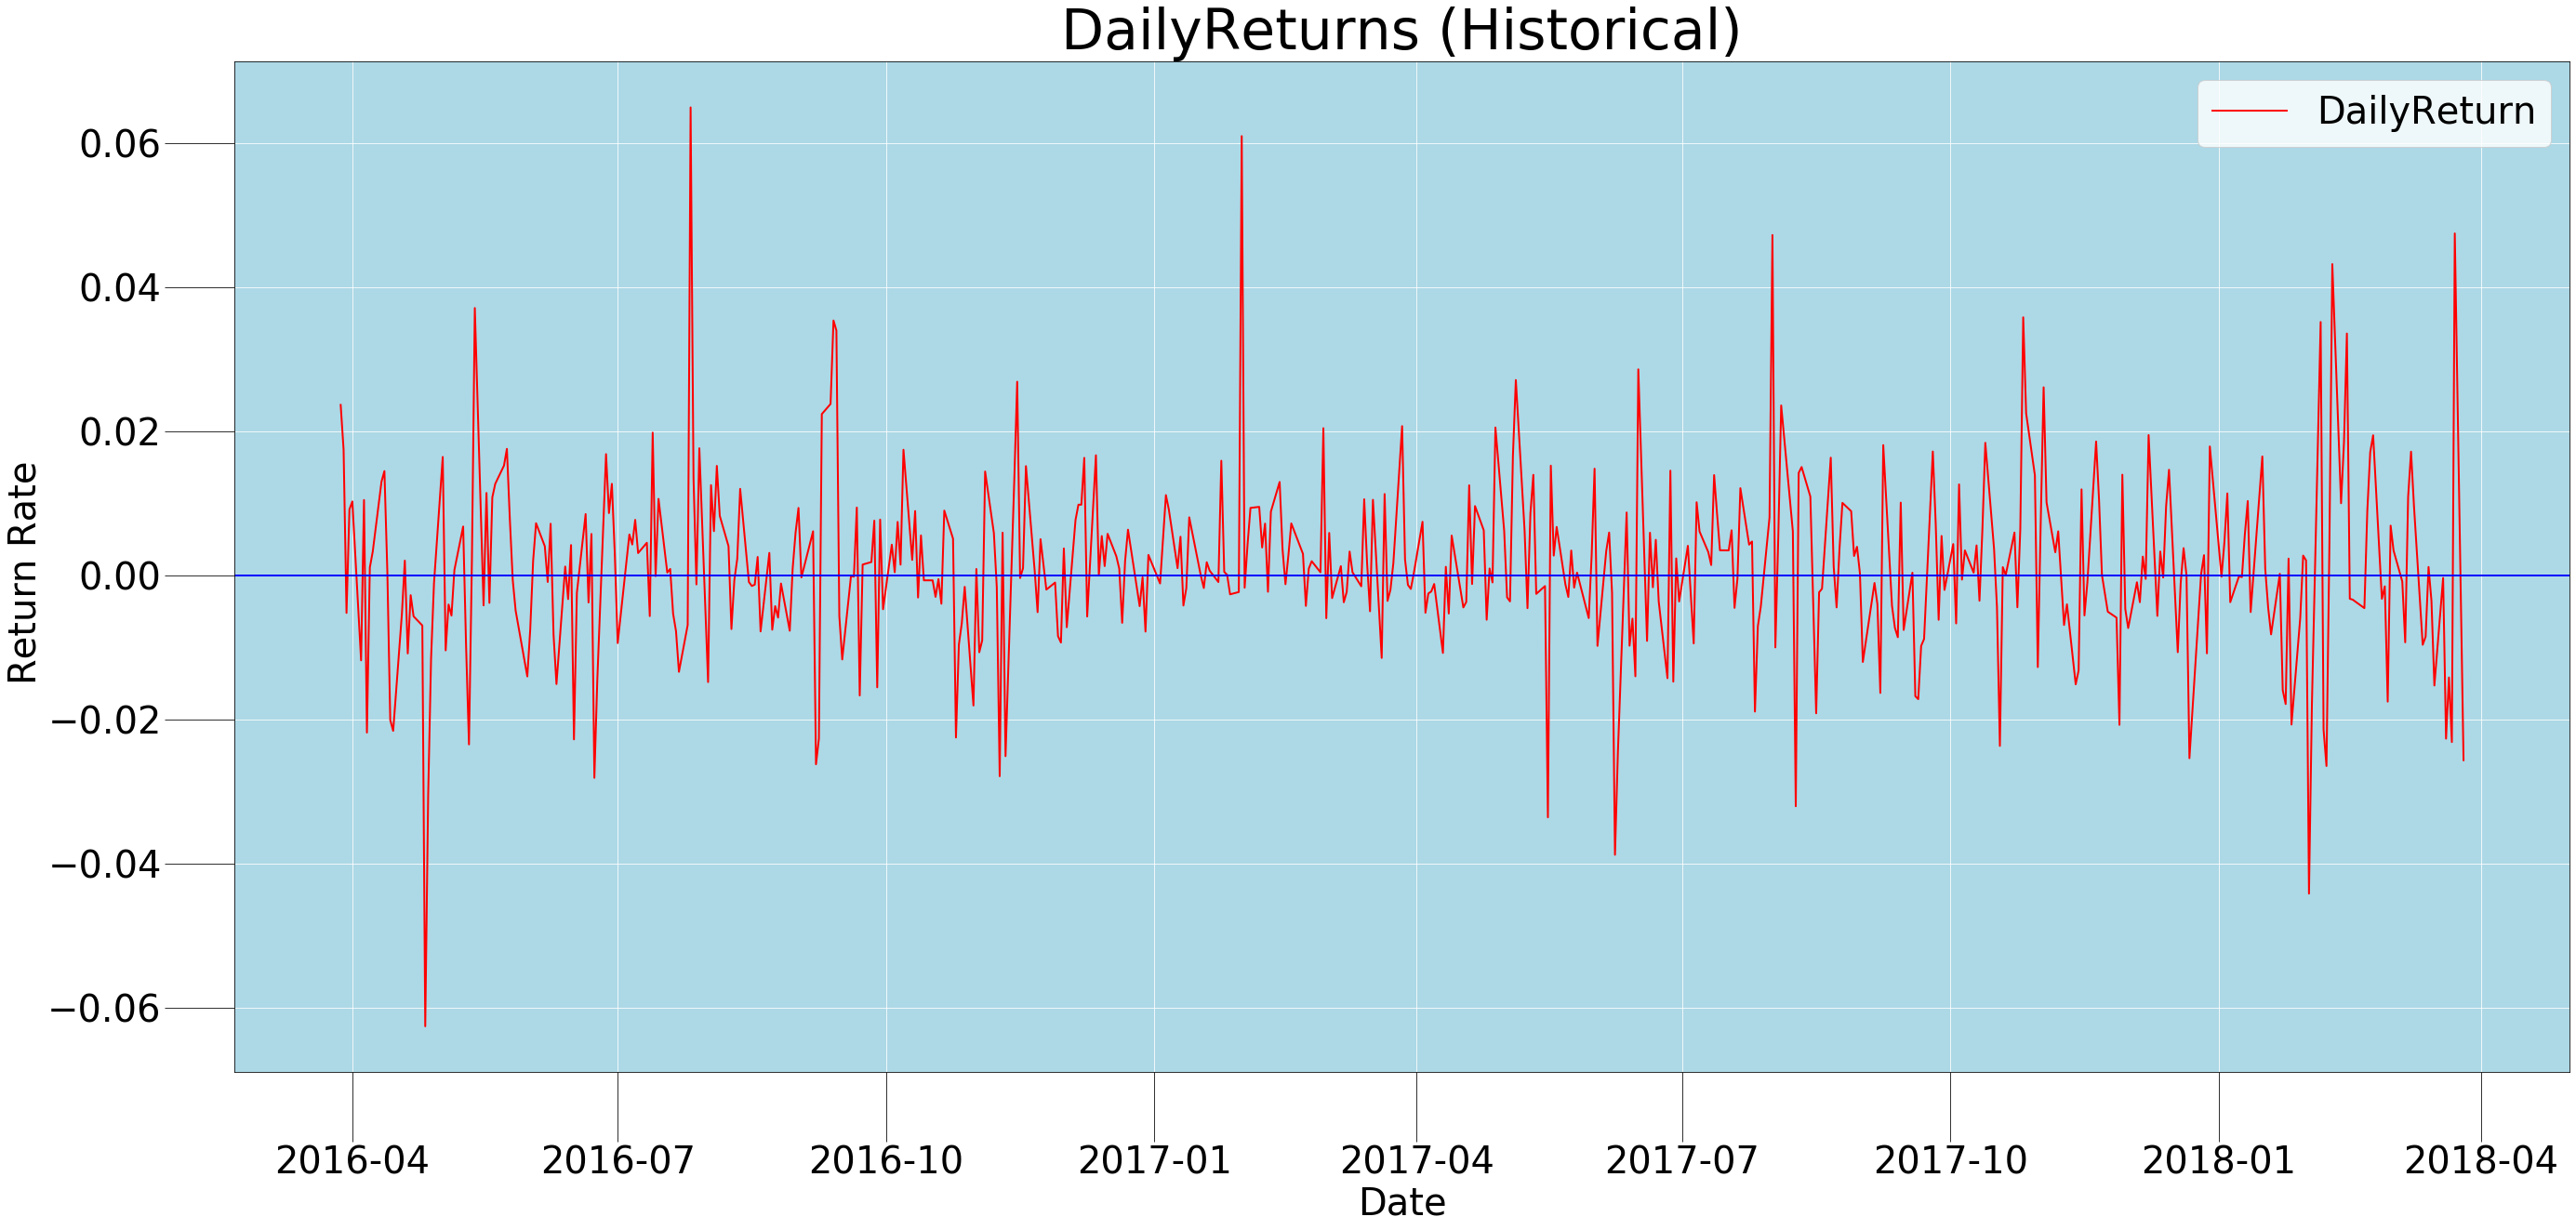

In [101]:
x_axis_dr = df2['DailyReturn']
y_axis = df2['Date']
figure, ax = plt.subplots()

ax.plot(y_axis,x_axis_dr,color='r',label='DailyReturn',linewidth=2)
ax.axhline(linewidth=2, color='b')
ax.grid(color='white')
ax.set_title(f'DailyReturns (Historical)',size = 60)

ax.set_xlabel('Date',fontsize = 40)
ax.set_ylabel('Return Rate ',fontsize = 40)
ax.set_facecolor('lightblue')
figure.set_figheight(20)
figure.set_figwidth(45)
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40, size=75)
plt.savefig("static/img/dr.png")
plt.show()



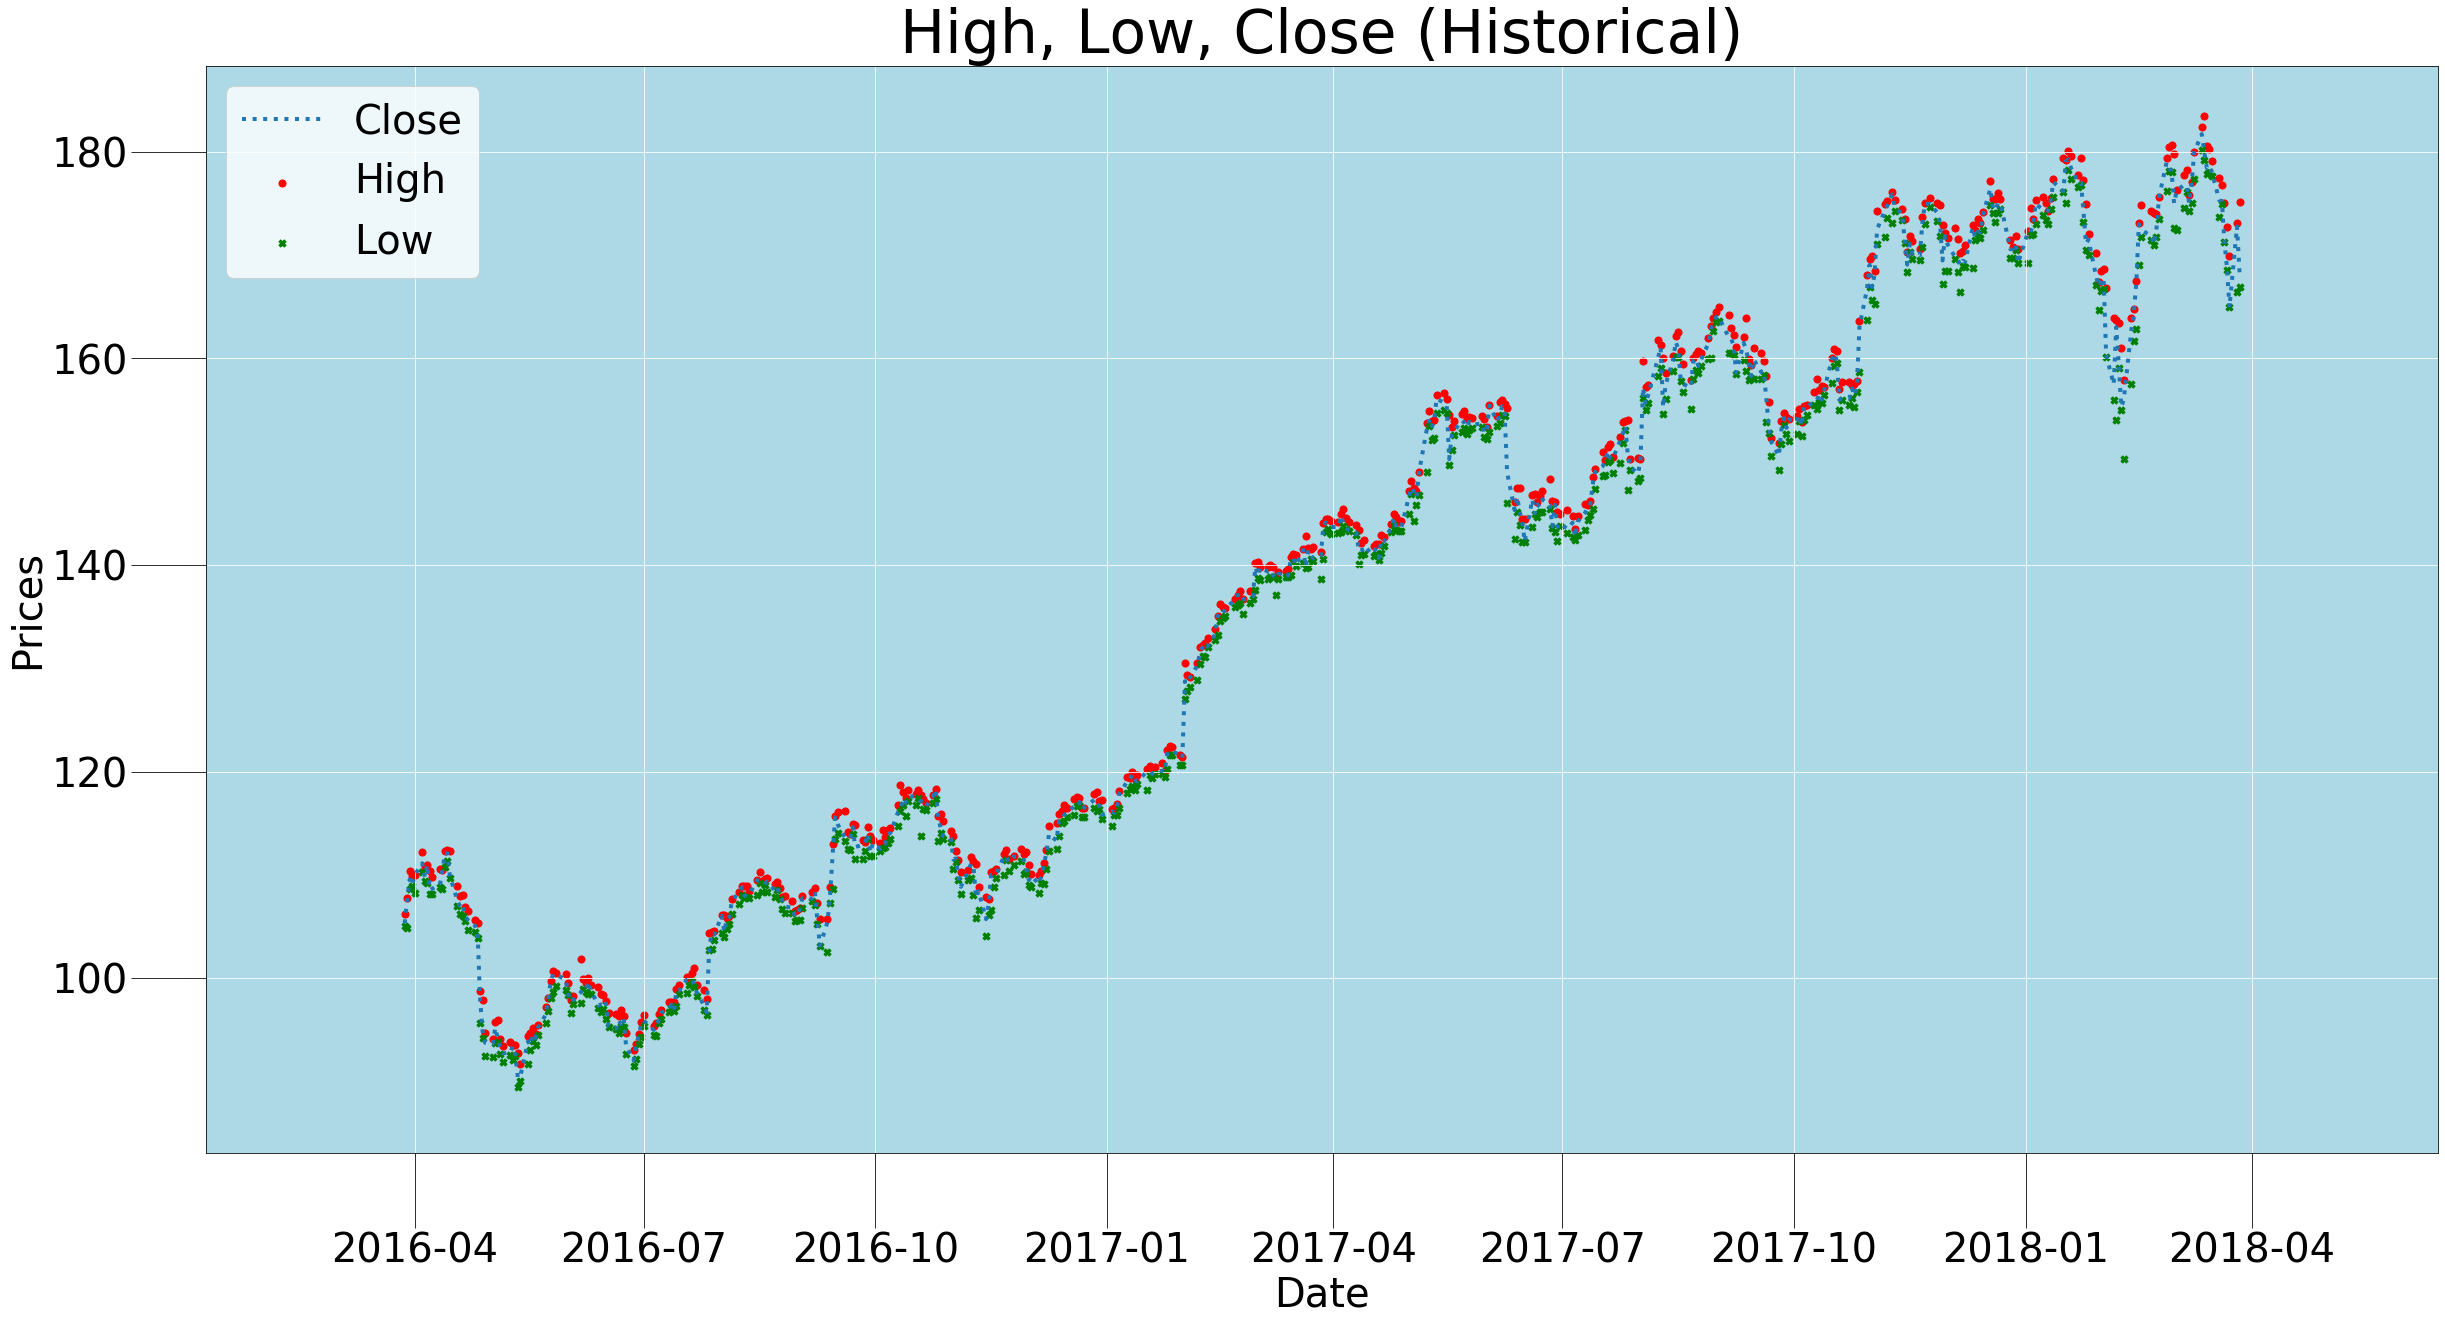

In [91]:
# x_axis = df_7day_volume_clean['Date']
# y_axis = df_7day_volume_clean['Volume']
x_axis_open = df2['Open']
x_axis_high = df2['High']
x_axis_low = df2['Low']
x_axis_close = df2['Close']
y_axis = df2['Date']
figure, ax = plt.subplots()
# ax.scatter(y_axis,x_axis_open,color='b',label='Open')
ax.scatter(y_axis,x_axis_high,marker="o",color='r',label='High',s=50)
ax.scatter(y_axis,x_axis_low,marker='X',color='g',label='Low',s=50)
ax.plot(y_axis,x_axis_close,label='Close',linewidth=4,linestyle=":")
ax.grid(color='white')
ax.set_title(f'High, Low, Close (Historical)',size = 60)

ax.set_xlabel('Date',fontsize = 40)
ax.set_ylabel('Prices',fontsize = 40)
ax.set_facecolor('lightblue')
figure.set_figheight(20)
figure.set_figwidth(40)
plt.legend(loc='best',prop={'size':40})
ax.tick_params(axis='both', labelsize=40, size=75)
plt.savefig("static/img/ohlc.png")
plt.show()

In [84]:
# x_axis = df2_weekly_clean['Date']
# y_axis = df2_weekly_clean['Volume']
# x_axis_vol_10wk = df2_weekly_clean
# figure, ax = plt.subplots()
# ax.yaxis.set_major_formatter(formatter)
# ax.bar(x_axis,y_axis,edgecolor='b')
# ax.plot()
# ax.grid(color='white')
# ax.set_title(f'Volume by weeks',size = 40)
# ax.set_xlabel('Date (Weekly)',fontsize = 40)
# ax.set_ylabel('Volume',fontsize = 40)
# ax.set_facecolor('lightblue')
# figure.set_figheight(25)
# figure.set_figwidth(80)
# ax.tick_params(axis='both', labelsize=40)
# #plt.savefig(os.path.join(f'Volume by weeks'))
# plt.show()

In [86]:
df3 = df2[['Open','High','Low','Close','Volume']]

In [87]:
df3

Open    High     Low    Close      Volume
Date                                                   
2018-03-27  173.68  175.15  166.92  168.340  38962839.0
2018-03-26  168.07  173.10  166.44  172.770  36272617.0
2018-03-23  168.39  169.92  164.94  164.940  40248954.0
2018-03-22  170.00  172.68  168.60  168.845  41051076.0
2018-03-21  175.04  175.09  171.26  171.270  35247358.0
...            ...     ...     ...      ...         ...
2016-04-01  108.78  110.00  108.20  109.990  25873950.0
2016-03-31  109.72  109.90  108.88  108.990  25888449.0
2016-03-30  108.65  110.42  108.60  109.560  45601149.0
2016-03-29  104.89  107.79  104.88  107.680  31190083.0
2016-03-28  106.00  106.19  105.06  105.190  19411372.0

[503 rows x 5 columns]

In [88]:
# df3 = df2[['Open', 'High', 'Low', 'Close']].values.tolist()
# pdates = mdates.date2num(df2.index)
# df_ohlc = [ [pdates[x]] + df3[x] for x in range(len(pdates)) ]

In [89]:
df3.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2016-04-08', '2016-04-07', '2016-04-06', '2016-04-05',
               '2016-04-04', '2016-04-01', '2016-03-31', '2016-03-30',
               '2016-03-29', '2016-03-28'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

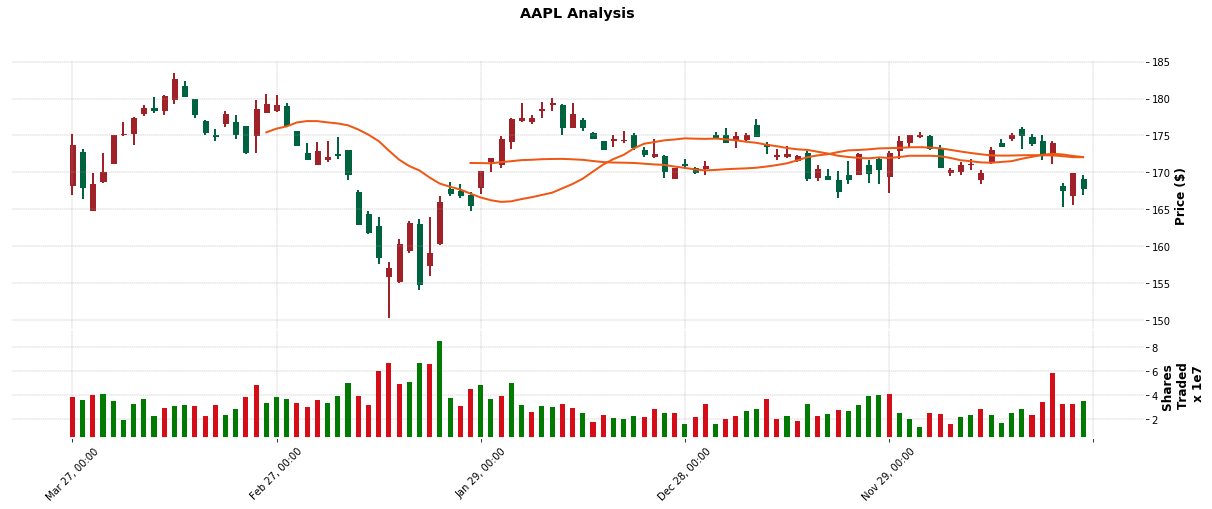

In [90]:
# fig, ax = plt.subplots(figsize = (40,20))

mpf.plot(df3[:100], figratio=(45,15),figscale=0.5, type='candle', style='charles',
            title=f'{pstock} Analysis',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True, 
            mav=(20,40), 
            savefig='static/img/ohlc_mpf.png')

# ax.set_xlabel('Date')
# ax.set_ylabel('Price ($)')
# ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart')

# Choosing to display the dates as "Month Day":
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:

plt.show() # add this if you're not using Jupyter Notebook

In [153]:
# mpf.plot(df2[:50], type='candlestick', no_xgaps = True)
# plt.show()

In [ ]:

# fig, ax = plt.subplots(figsize = (40,20))

# mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

# ax.set_xlabel('Date')
# ax.set_ylabel('Price ($)')
# ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart')

# # Choosing to display the dates as "Month Day":
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# # This is to automatically arrange the date labels in a readable way:
# fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

In [180]:
ohlc_url = 'static/img/ohlc_mpf.png'
mva5d_url = 'static/img/5d-wk-close.png'
mva20d_url = 'static/img/20d-wk-close.png'
mvawks_url = 'static/img/wk-close-ma.png'
ocl_url = 'static/img/ohlc.png'
weekly_vol_url = 'static/img/volume_weekly.png'
dr_url = 'static/img/dr.png'

In [115]:
df2.to_csv("data/df2.csv")

In [116]:
df2_weekly_clean.to_csv("data/df2_weekly_clean.csv")

In [183]:
to_database = {

    "stock":pstock,
    "wkly_vol":weekly_vol_url,
    "5dmva": mva5d_url,
    "20dmva": mva20d_url,
    "week_ma": mvawks_url,
    "ocl": ocl_url,
    "ohlc_mpf":ohlc_url,
    "dr":dr_url

}

In [184]:
to_database

{'stock': 'AAPL',
 'wkly_vol': 'static/img/volume_weekly.png',
 '5dmva': 'static/img/5d-wk-close.png',
 '20dmva': 'static/img/20d-wk-close.png',
 'week_ma': 'static/img/wk-close-ma.png',
 'ocl': 'static/img/ohlc.png',
 'ohlc_mpf': 'static/img/ohlc_mpf.png'}

In [ ]:
# from sklearn.linear_model import LinearRegression

In [ ]:
# connection_string = 'postgres:root123@localhost:5432/database_name'
# engine = create_engine(f'postgresql://{connection_string}')

In [ ]:
# df1.to_sql(name='tablename1',con=engine,if_exists='replace',index=True)

In [ ]:
# df2.to_sql(name='tablename2', con=engine,if_exists='replace', index=False)